### **1. Load the required libraries**

In [62]:
import tarfile
import os

import pandas as pd
import xarray as xr
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt



### **2. Set the path**

In [63]:
path = r'/content/drive/MyDrive/group_project/data'

os.chdir(path)

### **3. Extract files from the tar files**

In [64]:
fname = os.listdir(path)[0]

if os.path.splitext(fname)[1] == ".gz":
  tar = tarfile.open(fname, "r:gz")
  tar.extractall()
  tar.close()

### **4. Create the individual CSV files**

In [65]:
for filename in os.listdir(path):
    f = os.path.join(path, filename)
    if os.path.splitext(f)[-1] == ".nc": # check if it's a .nc file
        tas_hist = xr.open_dataset(filename)
        df = tas_hist.to_dataframe()
        df.reset_index(inplace=True) # collapse by 1 level to flatten dataframe
        df["time"] = df["time"].dt.strftime('%d-%m-%Y') # reformat the time column to leave only the date information
        df["time"]= pd.to_datetime(df["time"]) # change back into datetime format
        df["year"] = pd.DatetimeIndex(df["time"]).year # make a new column containing the year
        df = df.dropna() # clean up to drop N/A values
        df = df.groupby(["latitude", "longitude", "year"], as_index=False)["tas"].mean() # calculate avg temp anomaly over year for each set of latitude and longitude coordinates
        df.to_csv("/content/drive/MyDrive/group_project/outputs_header/anomaly_" + filename[-12:-8] + ".csv", index = False) # write the dataframe to a csv 


### **5. Create merged file for data range**

In [66]:
df_1979 = pd.read_csv("/content/drive/MyDrive/group_project/outputs_header/anomaly_1979.csv")
df_1999 = pd.read_csv("/content/drive/MyDrive/group_project/outputs_header/anomaly_1999.csv")
df_2019 = pd.read_csv("/content/drive/MyDrive/group_project/outputs_header/anomaly_2019.csv")

years = [df_1979, df_1999, df_2019]

anomaly_range  = pd.concat(years)

anomaly_range.to_csv("/content/drive/MyDrive/group_project/outputs_header/data_range.csv")



In [67]:
# Use describe() to view min and max 
anomaly_range.describe()

,latitude,longitude,year,tas
count,72933.000000,72933.000000,72933.000000,72933.000000
mean,1.139217,16.264386,1999.000000,0.565447
std,58.131612,90.306646,16.330044,1.063471
min,-89.500000,-179.500000,1979.000000,-2.689724
25%,-71.500000,-65.500000,1979.000000,-0.135851
50%,18.500000,25.500000,1999.000000,0.448253
75%,53.500000,94.500000,2019.000000,1.176314
max,83.500000,179.500000,2019.000000,6.187570


### **4. Generate plots for initial inspection**

In [68]:
os.chdir(path)

#### **1979**

In [69]:
tas_hist_79 = xr.open_dataset("BERKEARTH_mean_temperature-anomaly_mon_1x1_global_1979_v1.0.nc")

In [70]:
tas_hist_79_ann_mean = tas_hist_79["tas"].mean("time")

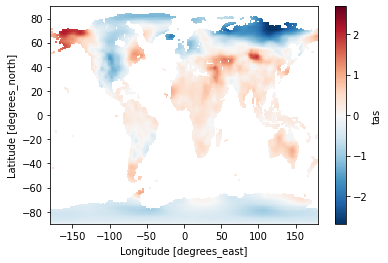

In [71]:
tas_hist_79_ann_mean.plot()

#### **1999**

In [72]:
tas_hist_99 = xr.open_dataset("BERKEARTH_mean_temperature-anomaly_mon_1x1_global_1999_v1.0.nc")

In [73]:
tas_hist_99_ann_mean = tas_hist_99["tas"].mean("time")

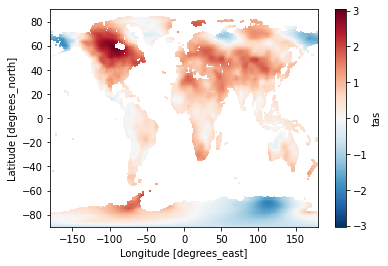

In [74]:
tas_hist_99_ann_mean.plot()

#### **2019**

In [75]:
tas_hist_19 = xr.open_dataset("BERKEARTH_mean_temperature-anomaly_mon_1x1_global_2019_v1.0.nc")

In [76]:
tas_hist_19_ann_mean = tas_hist_19["tas"].mean("time")

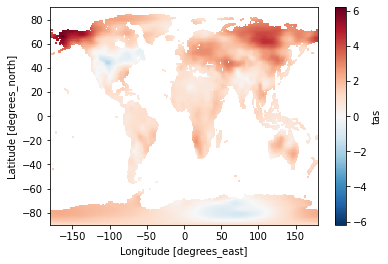

In [77]:
tas_hist_19_ann_mean.plot()